In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("C:\\Users\\Amy\\Desktop\\Green_Git\\eegClassification\\sample_data\\train.csv")

In [5]:
df.describe()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
count,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000
mean,2.104387e+09,26.286189,118.817228,1.067262e+09,43.733596,520.431404,2.141415e+09,32304.428493,0.878024,1.138783,1.264925,0.948296,1.059185,1.966283
std,1.233371e+09,69.757658,314.557803,6.291475e+08,104.292116,1449.759868,1.241670e+09,18538.196252,1.538873,2.818845,3.131889,2.136799,2.228492,3.621180
min,5.686570e+05,0.000000,0.000000,3.537330e+05,0.000000,0.000000,3.380000e+02,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.026896e+09,1.000000,6.000000,5.238626e+08,2.000000,12.000000,1.067419e+09,16707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.071326e+09,5.000000,26.000000,1.057904e+09,8.000000,62.000000,2.138332e+09,32068.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.172787e+09,16.000000,82.000000,1.623195e+09,29.000000,394.000000,3.217816e+09,48036.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,4.294958e+09,742.000000,3372.000000,2.147388e+09,1021.000000,17632.000000,4.294934e+09,65494.000000,19.000000,18.000000,16.000000,15.000000,15.000000,25.000000


In [6]:
df["eeg_id"].unique().size

17089

In [10]:
class_votes = [
    "seizure_vote",
    "lpd_vote",
    "gpd_vote",
    "lrda_vote",
    "grda_vote",
    "other_vote",
]

df["total votes"] = df[class_votes].sum(axis=1)

# label
df["label"] = df[class_votes].idxmax(axis=1)

<Axes: xlabel='label'>

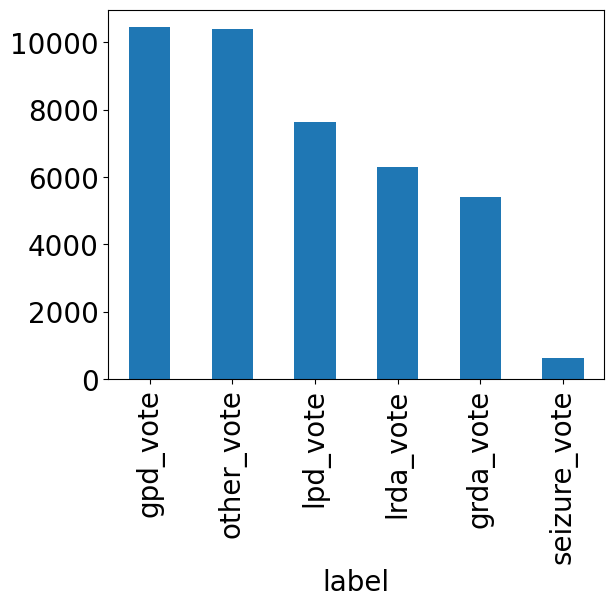

In [18]:
# bar graph of label counts
# increase font size
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
df[df["total votes"]>5]["label"].value_counts().plot(kind="bar")

In [20]:
df["total votes"].value_counts()

total votes
3     51867
15    10665
13     7525
16     5191
1      4360
12     4356
5      3974
14     3887
4      3451
11     2602
2      2316
18     1934
17     1445
10     1146
6       883
20      634
19      250
21      179
22       54
23       24
25       20
24       17
28        6
26        6
27        5
7         3
Name: count, dtype: int64

<Axes: >

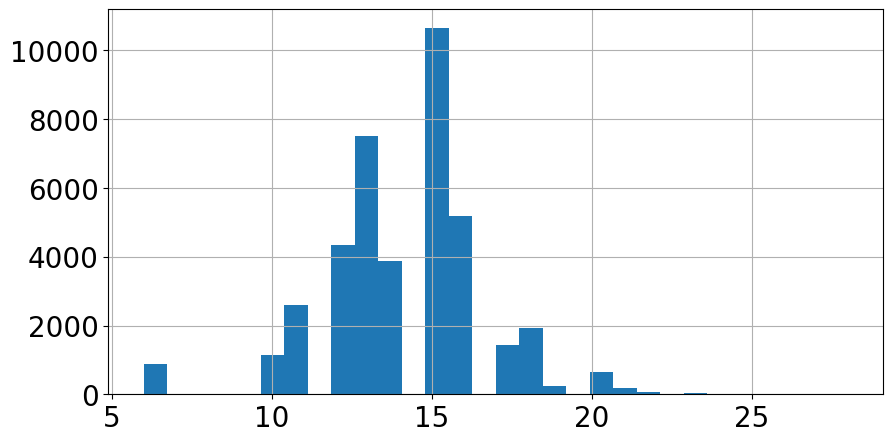

In [17]:
# incease fig size
plt.figure(figsize=(10, 5))
df["total votes"].hist(bins=30)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# %cd /content/drive/MyDrive/Sun/ML Shock/Final project/eegClassification

In [ ]:
# path = '/content/drive/MyDrive/Sun/ML Shock/Final project/eegClassification/'
path = '../'

In [ ]:
dfs = []
for p in ['files/train_processed.csv', 'files/test_processed.csv', 'files/val_processed.csv' ]:
    dfs.append(pd.read_csv(path + p))

In [ ]:
dfs[0].columns

Index(['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id',
       'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id',
       'patient_id', 'expert_consensus', 'seizure_vote', 'lpd_vote',
       'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote', 'total_votes',
       'seizure_prob', 'lpd_prob', 'gpd_prob', 'lrda_prob', 'grda_prob',
       'other_prob'],
      dtype='object')

In [ ]:
meta_data = [
    "eeg_id",
    "eeg_sub_id",
    "eeg_label_offset_seconds",
    "spectrogram_id",
    "spectrogram_sub_id",
    "spectrogram_label_offset_seconds",
    "label_id",
    "patient_id",
    "expert_consensus",
    "total_votes",
    "file_path",
]
class_votes = [
    "seizure_vote",
    "lpd_vote",
    "gpd_vote",
    "lrda_vote",
    "grda_vote",
    "other_vote",
]
class_probs = [
    "seizure_prob",
    "lpd_prob",
    "gpd_prob",
    "lrda_prob",
    "grda_prob",
    "other_prob",
]

In [9]:
for t, df in zip(['train', 'test', 'validation'],dfs):
    print(f"EEG count for {t} set: \t",df['eeg_id'].count())

EEG count for train set: 	 65509
EEG count for test set: 	 19514
EEG count for validation set: 	 21777


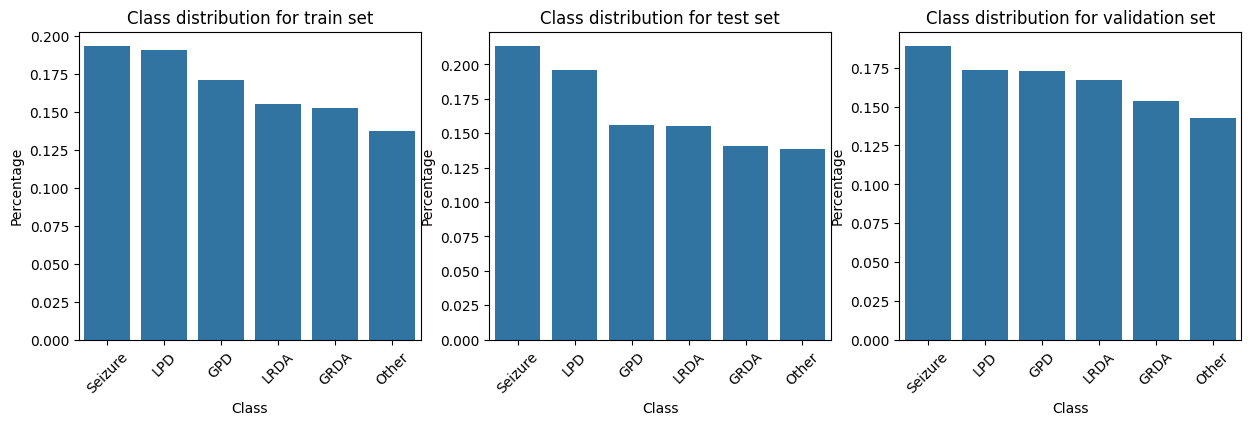

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for i, df in enumerate(dfs):
    sns.barplot(data=df[class_probs].idxmax(axis=1).value_counts(normalize=True), ax=ax[i])
    ax[i].set_title(f'Class distribution for {["train", "test", "validation"][i]} set')
    ax[i].set_xlabel('Class')
    ax[i].set_ylabel('Percentage')
    ax[i].set_xticks(range(6))
    ax[i].set_xticklabels(['Seizure', 'LPD', 'GPD', 'LRDA', 'GRDA', 'Other'], rotation=45)

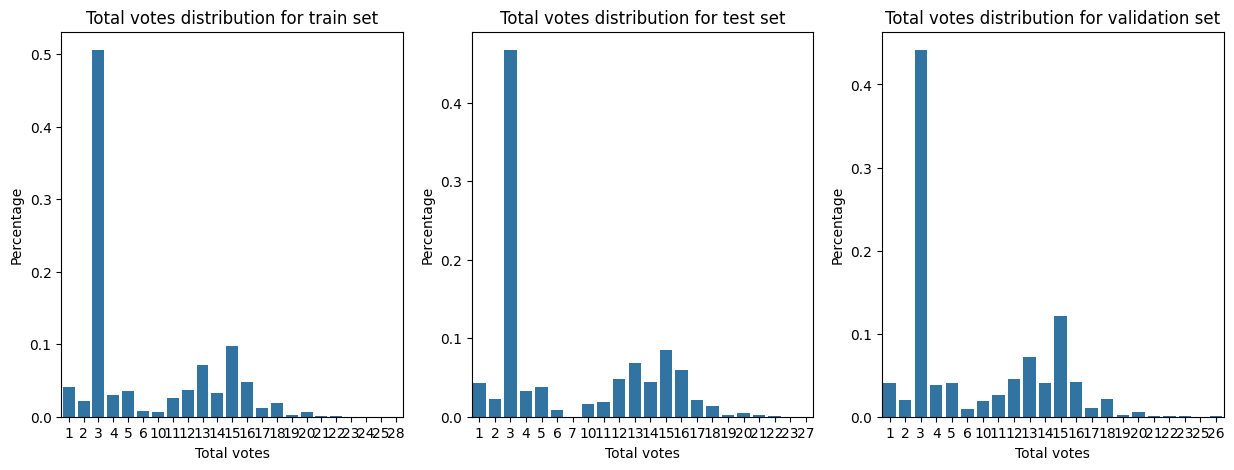

In [11]:
# compare the total votes distribution of the total votes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, df in enumerate(dfs):
    sns.barplot(data=df['total_votes'].value_counts(normalize=True), ax=ax[i])
    ax[i].set_title(f'Total votes distribution for {["train", "test", "validation"][i]} set')
    ax[i].set_xlabel('Total votes')
    ax[i].set_ylabel('Percentage')

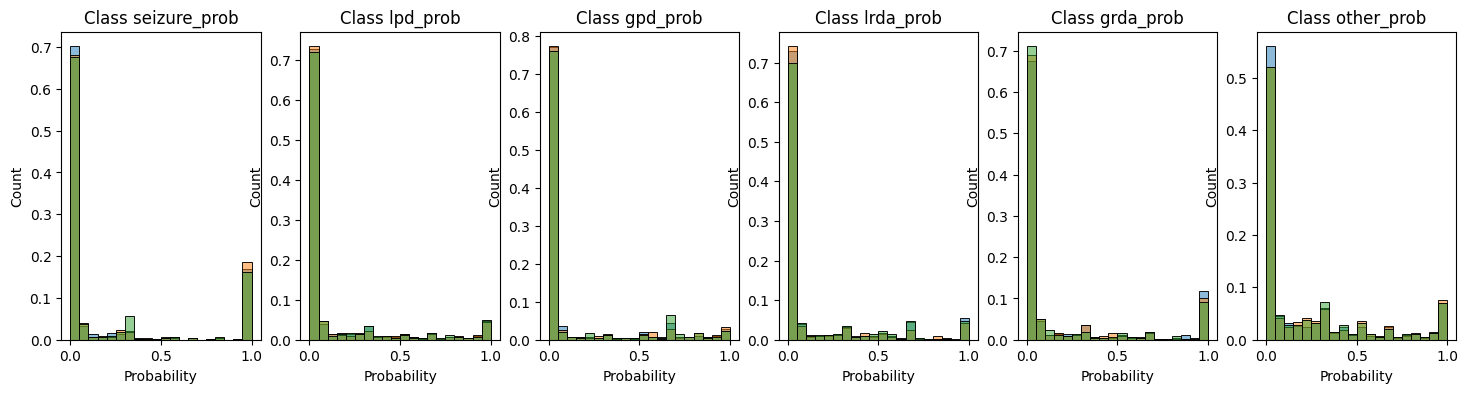

In [64]:
# for the first dataset plot the probability distribution of the classes, each class on a different plot
n = len(class_probs)
fig, ax = plt.subplots(1, n, figsize=(18,4))

for i, c in enumerate(class_probs):
    for j in range(3):
        # print(dfs[j][c].nunique())
        sns.histplot(data=dfs[j][c], ax=ax[i%n], bins = 20, stat='probability', alpha=0.5)

    ax[i%n].set_title(f'Class {c}')
    ax[i%n].set_xlabel('Probability')
    ax[i%n].set_ylabel('Count')

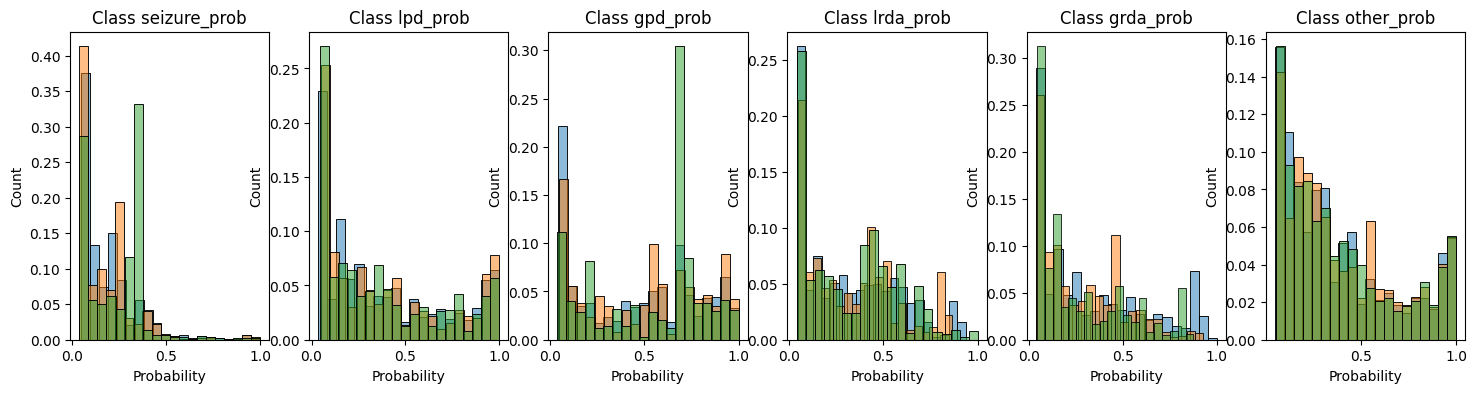

In [85]:
# for the first dataset plot the probability distribution of the classes, each class on a different plot
n = len(class_probs)
fig, ax = plt.subplots(1, n, figsize=(18, 4))


for i, c in enumerate(class_probs):
    for j in range(3):
        # print(dfs[j][c].nunique())
        mask =   (dfs[j][c] > 0) & (dfs[j]['total_votes'] > 6) #& (dfs[j]['total_votes'] < 5)
        # (dfs[j]['total_votes'] > 0)#
        sns.histplot(data=dfs[j][mask][c], ax=ax[i%n], bins = 20, stat='probability', alpha=0.5)

    ax[i%n].set_title(f'Class {c}')
    ax[i%n].set_xlabel('Probability')
    ax[i%n].set_ylabel('Count')

In [71]:
dfs[0][class_probs].head()

,seizure_prob,lpd_prob,gpd_prob,lrda_prob,grda_prob,other_prob
0,0.0,0.0625,0.0,0.875,0.0,0.0625
1,0.0,0.0625,0.0,0.875,0.0,0.0625
2,0.0,0.0625,0.0,0.875,0.0,0.0625
3,0.0,0.0625,0.0,0.875,0.0,0.0625
4,0.0,0.0625,0.0,0.875,0.0,0.0625


In [83]:
# number of data points for each eeg_id
dfs[0].groupby('eeg_id').size().value_counts()  

1      3785
2      1231
3       831
4       793
5       550
       ... 
109       1
142       1
562       1
433       1
226       1
Name: count, Length: 121, dtype: int64